Resolvemos
\begin{align*}
  y' &= f(t,y)\\
  y(a) &= \alpha\\
  a\leq & t  \leq b
\end{align*}

una ODE rígida: un factor de la forma $e^{-ct}, c>0$ aparece en la solución y como producto Runge-Kutta 4 o Predictor Corrector divergen.

El método implícito trapezoidal es el sgte:
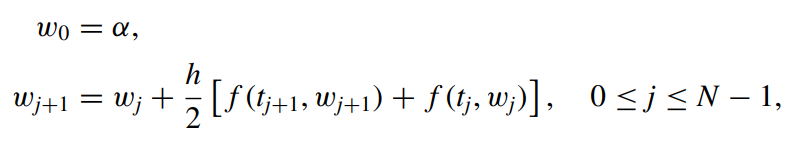

Testearemos el problema con $$f(t,y)=5e^{5t}(y-t)^2 + 1, 0 \leq t \leq 1, y(0)=-1$$ cuya solución explícita es $y(t) = t - e^{-5t}$.

-----------------------------------
  aproximación  error:|u(t)-w(t)|
-----------------------------------
    -1.00000        0.00000     
    -0.14150        0.02638     
    0.27486         0.01020     
    0.55398         0.00377     
    0.78307         0.00139     
    0.99376         0.00050     


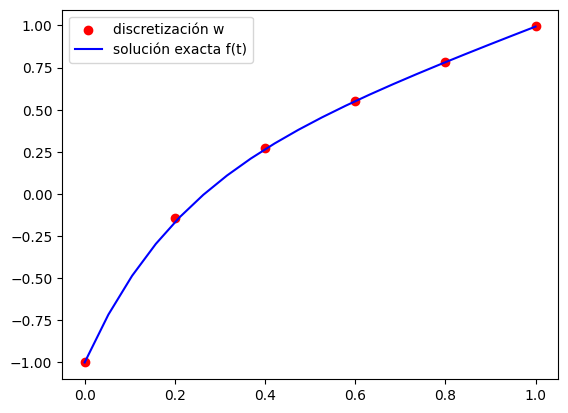

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp
from numpy import linspace as lin

#datos fijos
n = 5
f = lambda t,y: 5 * exp(5*t) * (y-t)**2 + 1
fy = lambda t,y: 10 * exp(5*t) * (y-t)
u = lambda t: t - exp(-5*t)
a = 0
b = 1
alfa = -1
h = (b-a)/n
t = np.array([a + i*h for i in range(n+1)])

def trapezio(f,alfa):
  w = np.zeros(n+1,float)
  w[0] = alfa
  for i in range(n):
    x = w[i]
    for j in range(6):
      x = x - (x - w[i] - 0.5 * h * (f(t[i+1],x) + f(t[i],w[i])))/(1 - 0.5 * h * fy(t[i+1],x))
    w[i+1] = x
  return w

w = trapezio(f,alfa)
plt.scatter(t,w, label = 'discretización w', c = 'red')
xx = lin(a,b,20)
plt.plot(xx,u(xx), label='solución exacta f(t)', c = 'blue')
# plt.grid(visible = True, which = 'mayor')
plt.legend()
dash = '-'*35
for i in range(n+1):
  if i==0:
    print(dash)
    print('{:^16s}{:^16s}'.format("aproximación","error:|u(t)-w(t)|"))
    print(dash)
  print('{:^16.5f}{:^16.5f}'.format(w[i],np.abs(w[i]-u(t[i]))))

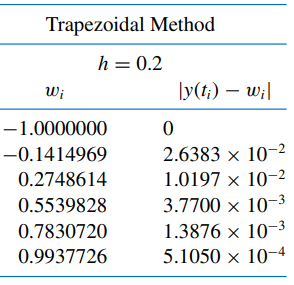

In [2]:
'''
    Comparando con RUNGE KUTTA 4 Y MÉTODO PREDICTOR CORRECTOR
    h = 0.20 <=> n = 5
'''

def RK4(f,x0):
  u = np.zeros(n+1,float)
  u[0]=x0
  for i in range(n):
    K1 = f(t[i],u[i])
    K2 = f(t[i]+h/2,u[i]+K1*h/2)
    K3 = f(t[i]+h/2,u[i]+K2*h/2)
    K4 = f(t[i]+h,u[i]+h*K3)
    u[i+1]= u[i] + (h/6)*(K1+2*K2+2*K3+K4)
  return u

def predictor_corrector(f,x0):
  u = np.zeros(n+1)
  u[0]=x0
  for i in range(n):
    u[i+1]= u[i] + h*f(t[i],u[i])
    u[i+1] = u[i] + (h/2)*(f(t[i],u[i])+f(t[i+1],u[i+1]))
  return u

w1 = RK4(f,alfa)
w2 = predictor_corrector(f,alfa)

for i in range(n+1):
  if i==0:
    print(dash*2)
    print('{:^16s}{:^16s}{:^16s}{:^16s}'.format("aprox por RK4","error","arox por pred_corr","error"))
    print(dash*2)
  print('{:^16.5f}{:^16.5f}{:^16.5f}{:^16.5f}'.format(w1[i],np.abs(w1[i]-u(t[i])),w2[i],np.abs(w2[i]-u(t[i]))))
# print(w1)
# print(w2)

----------------------------------------------------------------------
 aprox por RK4       error      arox por pred_corr     error      
----------------------------------------------------------------------
    -1.00000        0.00000         -1.00000        0.00000     
    -0.14885        0.01903         -0.30000        0.13212     
    0.26849         0.00382         0.35892         0.09425     
    0.55199         0.00178         0.57337         0.02316     
    0.78229         0.00060         0.78468         0.00300     
    0.99349         0.00023         0.99155         0.00171     


In [3]:
'''
    h = 0.25 <=> n = 4
'''

n = 4
a = 0
b = 1
alfa = -1
h = (b-a)/n
t = np.array([a + i*h for i in range(n+1)])

w = trapezio(f,alfa)
w1 = RK4(f,alfa)
w2 = predictor_corrector(f,alfa)

for i in range(n+1):
  if i==0:
    print(dash*2)
    print('{:^20s}{:^20s}{:^20s}'.format("aprox_trapezio","aprox_RK4","aprox_pred_corr",))
    print(dash*2)
  print('{:^20.5f}{:^20.5f}{:^20.5f}'.format(w[i],w1[i],w2[i]))

----------------------------------------------------------------------
   aprox_trapezio        aprox_RK4        aprox_pred_corr   
----------------------------------------------------------------------
      -1.00000            -1.00000            -1.00000      
      0.00546             0.40143             0.01134       
      0.42676             3.43748             0.38633       
      0.72915       144639161502657329233920.00000      0.91818       
      0.99390               inf              261.07784      


<ipython-input-1-9d30f090fefd>:8: RuntimeWarning: overflow encountered in double_scalars
  f = lambda t,y: 5 * exp(5*t) * (y-t)**2 + 1
